# Cropping 12-Lead ECG Images and Converting them into Time Series

1) Import necessary libraries/packages 

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os.path, sys, re
from PIL import Image
from keras.preprocessing import image

In [ ]:
#Check current directory/make sure it is set at where image data is located
cd 

2) Assess properties of sample image

In [ ]:
#load sample image, in this example 'Binder1_Page_233.jpg from ECGImagesofCOVID-19Patients'
img = image.load_img('ECG/data_v1/ECGImagesofCOVID-19Patients/Binder1_Page_233.jpg', color_mode = "grayscale") 
print(type(img)) #check image type
print(img.format) #check image format
print(img.mode) #check image mode
print(img.size) #check image size

# show the image
plt.imshow(img)

3) Resize image if necessary

In [ ]:
from PIL import Image
import os, sys
import glob

root_dir= "Documents/ErdosECG2/data_v1/ECGImagesofCOVID-19Patients/"  #set directory with desired folder(s)

for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    #print(filename)
    im = Image.open(filename)
    imResize = im.resize((1320,1020), Image.ANTIALIAS) #adjust desired image dimensions here, ex here: (1320,1020)
    imResize.save(filename , 'JPEG', quality=100) #save as new image with new file name in directory
    

4) Ser cropping dimensions for each lead based on the following labels



<div>
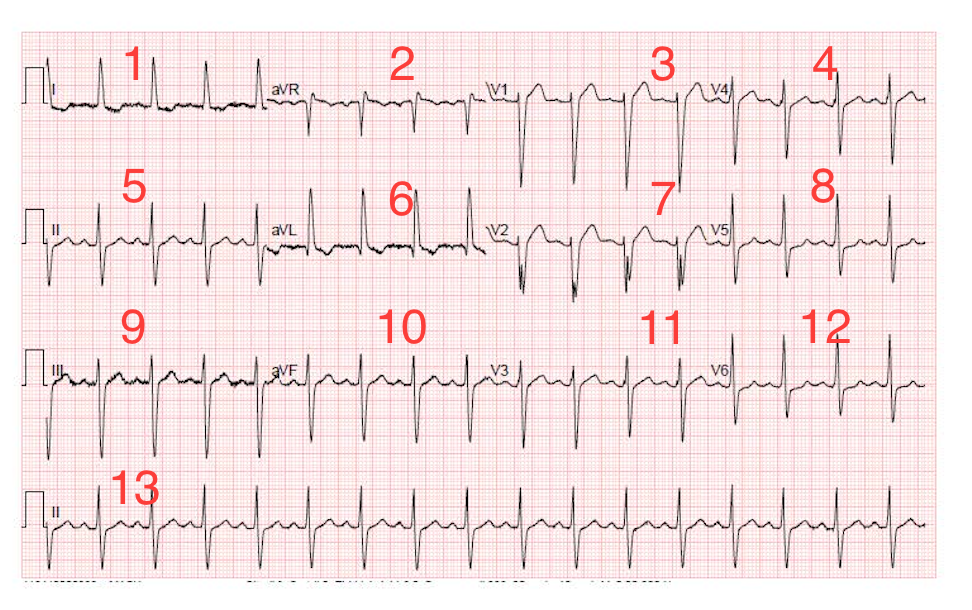
</div>

In [ ]:
#Load sample image
img = image.load_img('ECG/data_v1/ECGImagesofCOVID-19Patients/Binder1_Page_165.jpg', color_mode = "grayscale") 

#create cropping dictionary for the images, making sure only the signal is captured (not any outer lines/labels)
#these numbers refer to the left, top, right, bottom location of each image, respectively
#these must be adjusted if the image has a different size/structure or lead locations
crop_dict={}
crop_dict={ 'Lead1':(95,220,340,400), 'Lead2':(440,220,670,400),\
           'Lead3':(692,220,960,430), 'Lead4':(990,220,1270,400),\
           'Lead5':(85,400,375,580), 'Lead6':(440,400,670,580),\
           'Lead7':(695,400,960,580), 'Lead8':(990,410,1270,580),\
           'Lead9':(100,585,375,780), 'Lead10':(440,585,670,780),\
           'Lead11':(695,585,960,780), 'Lead12':(990,585,1270,780),\
           'Lead13':(85,775,1260,935)
           
          }

#From Binder1_Page_001 to Binder1_Page_089, threshold = 173, use:
#crop_dict={ 'Lead1':(145,110,297,220), 'Lead2':(335,110,470,220),\
 #          'Lead3':(500,110,655,250), 'Lead4':(675,110,825,220),\
  #         'Lead5':(145,200,300,350), 'Lead6':(330,220,470,330),\
   #        'Lead7':(500,230,648,350), 'Lead8':(675,200,825,325),\
    #       'Lead9':(145,320,300,460), 'Lead10':(331,320,470,460),\
     #      'Lead11':(498,320,648,460), 'Lead12':(673,320,825,460),\
      #     'Lead13':(145,460,825,540)
       #   }
        
#For Binder1_Page_090 to Binder1_Page_239, threshold = 173, resize images to 1320x1020 and use the following:
#crop_dict={ 'Lead1':(95,220,340,400), 'Lead2':(440,220,670,400),\
 #          'Lead3':(692,220,960,430), 'Lead4':(990,220,1270,400),\
  #         'Lead5':(85,400,375,580), 'Lead6':(440,400,670,580),\
   #        'Lead7':(695,400,960,580), 'Lead8':(990,410,1270,580),\
    #       'Lead9':(100,585,375,780), 'Lead10':(440,585,670,780),\
     #      'Lead11':(695,585,960,780), 'Lead12':(990,585,1270,780),\
      #     'Lead13':(85,775,1260,935)
       #   }

#For COVID_1 to COVID_12,threshold = 173, use:
#crop_dict={ 'Lead1':(160,320,640,600), 'Lead2':(700,350,1130,550),\
 #          'Lead3':(1180,350,1620,620), 'Lead4':(1660,300,2130,570),\
  #         'Lead5':(170,600,640,850), 'Lead6':(700,600,1135,850),\
   #        'Lead7':(1190,600,1625,940), 'Lead8':(1670,660,2130,890),\
    #       'Lead9':(180,920,640,1180), 'Lead10':(700,900,1135,1150),\
     #      'Lead11':(1170,960,1625,1250), 'Lead12':(1660,930,2130,1180),\
      #     'Lead13':(190,1210,2150,1490)
       #   }

#check cropped image
img_res = img.crop(crop_dict['Lead13']) #change ['Lead13'] as desired to check cropping result
img_res

5) Loop to crop all images in each folder

In [ ]:
#Make a new directory for the cropped images
!mkdir ECG/Cropped_Images/

def crop():
    for item in dirs:
        if item== '.DS_Store':
            continue
            
        if os.path.isfile(path+item):

            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            
            of, oe = os.path.splitext(item)
            
            for i in range(1,14):
                imCrop = im.crop(box=crop_dict['Lead'+str(i)])
                imCrop.save(path2+of+'Cropped_lead'+str(i)+'.png', "PNG", quality=100) #save cropped image for each lead
    

#Crop all images in each folder
for i in range(1,6): 

    if i==1:
        path = "ECG/data_v1/ECGImagesofCOVID-19Patients/"
        path2 = "ECG/Cropped_Images/ECGImagesofCOVID-19Patients"
        
    #if i==2:
     #   path = "ECG/data_v1/NormalPersonECGImages/"
      #  path2 = "ECG/Cropped_Images/NormalPersonECGImages"

   # if i==3:
    #    path = "ECG/data_v1/ECGImagesofMyocardialInfarctionPatients/"
     #   path2 = "ECG/Cropped_Images/ECGImagesofMyocardialInfarctionPatients"

   # if i==4:
    #    path = "ECG/data_v1/ECGImagesofPatientthathaveabnormalheartbeat/"
     #   path2="ECG/Cropped_Images/ECGImagesofPatientthathaveabnormalheartbeat/"

   # if i==5:
    #    path = "ECG/data_v1/ECGImagesofPatientthathaveHistoryofMI/"
     #   path2="ECG/Cropped_Images/ECGImagesofPatientthathaveHistoryofMI/"


    dirs = os.listdir(path)
    
    crop()


6) Image processing

In [ ]:
#Read cropped image
img=cv2.imread( 'Binder1_Page_090Cropped_lead1.png' )

#Convert colored image to grayscaled
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#show output image
plt.imshow(img)

In [ ]:
# Set threshold level
threshold_level = 173 #adjust based on image quality, ~20-50 for higher quality images, ~170 for lower quality

# Find coordinates of all pixels below threshold
coords = np.column_stack(np.where(gray < threshold_level))

print(coords)

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
img[mask] = (204, 119, 0)

In [ ]:
#Show processed image, the orange line represents the signal that is being picked up
plt.imshow(img)

In [ ]:
#Show masked image
plt.imshow(mask)

In [ ]:
#Assess image scatterplot

### indices = np.where(gray > 254)
coords = np.column_stack(np.where(gray < threshold_level))


np.array(indices).shape

plt.scatter(coords[:,1], coords[:,0])

#can adjust axis for proper viewing
plt.axis([0,250,150,0])


In [ ]:
#Deleting Instructions if needed
def purge(dir, pattern):
    for f in os.listdir(dir):
        if re.search(pattern, f):
            os.remove(os.path.join(dir, f))

7) Conversion of cropped images to CSV files

In [ ]:
#Create Directory
dirs = os.listdir(path)

threshold_level = 50 #officially set appropriate threshold before conversion
#50 used for non-COVID folders
#See step 4 comments for COVID image threshold levels

def Convert_csv():
    for item in dirs:
        if item== '.DS_Store':
            continue
            
        if os.path.isfile(path+item):

    
            img = cv2.imread(path+item)
            f, e = os.path.splitext(path+item)
            
            of, oe = os.path.splitext(item)
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Find coordinates of all pixels below threshold
            coords = np.column_stack(np.where(gray < threshold_level))
            coords[:,[0,1]]=coords[:,[1,0]]

            np.savetxt(path2+of+'.csv',coords)

#Run through each folder as needed
for i in range(1,6): 

    if i==1:
        path = "Cropped_Images/ECGImagesofCOVID-19Patients/"
        path2="CSV_data_v2/ECGImagesofCOVID-19Patients/"
        
    #if i==1:
     #   path = "Cropped_Images/ECGImagesofMyocardialInfarctionPatients/"
      #  path2="CSV_data_v2/EECGImagesofMyocardialInfarctionPatients/"
    
    #if i==1:
     #   path = "Cropped_Images/ECGImagesofPatientthathaveabnormalheartbeat/"
      #  path2="CSV_data_v2/ECGImagesofPatientthathaveabnormalheartbeat/"
        
    #if i==1:
     #   path = "Cropped_Images/NormalPersonECGImages/"
      #  path2="CSV_data_v2/NormalPersonECGImages/"
        
                
    #if i==1:
      #  path = "Cropped_Images/ECGImagesofPatientthathaveHistoryofMI/"
       # path2="CSV_data_v2/ECGImagesofPatientthathaveHistoryofMIs/"  
            
            
        dirs = os.listdir(path)
        
        Convert_csv()

In [ ]:
#Deleting Instructions if needed
def purge(dir, pattern):
    for f in os.listdir(dir):
        if re.search(pattern, f):
            os.remove(os.path.join(dir, f))